In [1]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from typing import List
np.set_printoptions(threshold=np.inf)  

from fragment import *
from side import *
from sides_comparison import *
from utils import *
from puzzle import *
from global_values import *

# Histograme pe toate imaginile

## Scor simplu

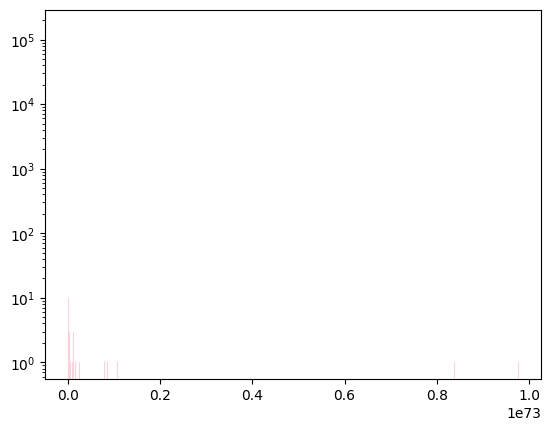

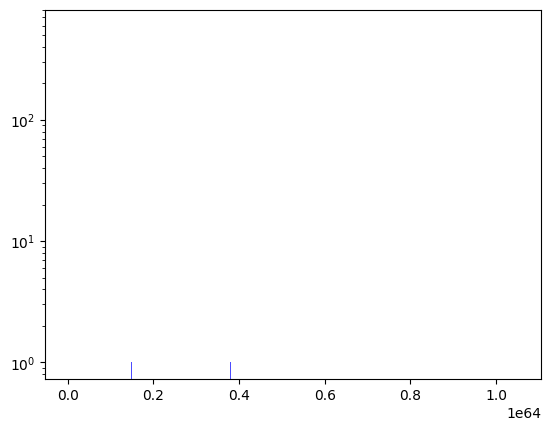

In [ ]:
output_folder = "fragments"

is_match_scores = []
is_not_match_scores = []

files = os.listdir("disney_puzzle")
for f in files:
    path = os.path.join("disney_puzzle",f)

    fragments = divide_image(path, output_folder, COL_NR, ROW_NR)
    sides_comparisons = create_sides_comparisons(fragments)

    for s in sides_comparisons:
        # if s.score < 1:
        if s.is_valid_match:
            is_match_scores.append(s.score)
        else:
            is_not_match_scores.append(s.score)

plt.hist(is_not_match_scores, bins=100, alpha=0.7, color='pink')
plt.yscale('log')
plt.show()
plt.hist(is_match_scores, bins=100, alpha=0.7, color='blue')
plt.yscale('log')
plt.show()

## Impartit la varianta imaginii

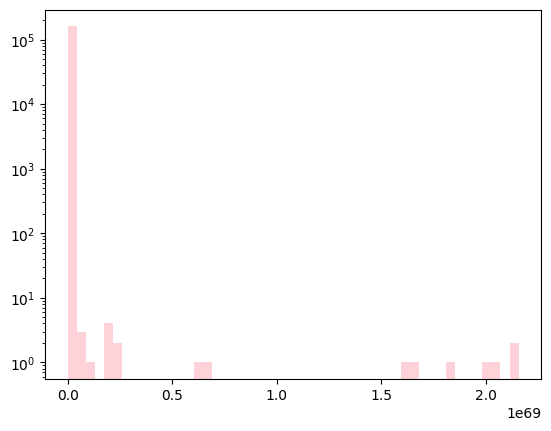

In [3]:
output_folder = "fragments"

is_match_scores = []
is_not_match_scores = []

files = os.listdir("disney_puzzle")
for f in files:
    path = os.path.join("disney_puzzle",f)
    image = cv.imread(path, cv.IMREAD_COLOR)  
    variance = np.var(image)

    fragments = divide_image(path, output_folder, COL_NR, ROW_NR)
    sides_comparisons = create_sides_comparisons(fragments)

    for s in sides_comparisons:
        if s.is_valid_match:
            is_match_scores.append(s.score/variance)
        else:
            is_not_match_scores.append(s.score/variance)

plt.hist(is_not_match_scores, bins=50, alpha=0.7, color='pink')
plt.hist(is_match_scores, bins=50, alpha=0.7, color='blue')
plt.yscale('log')
plt.show()

# Histograme pe o singura imagine

## Scor simplu

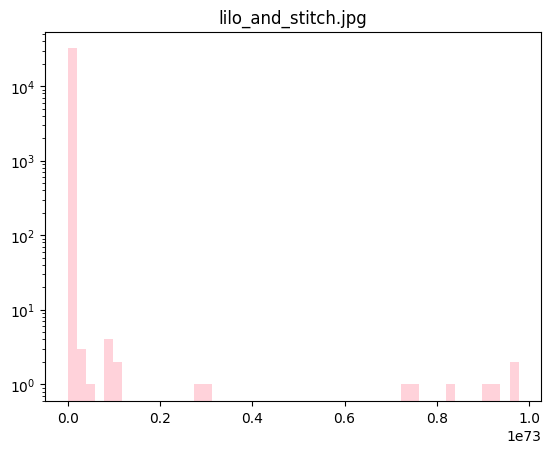

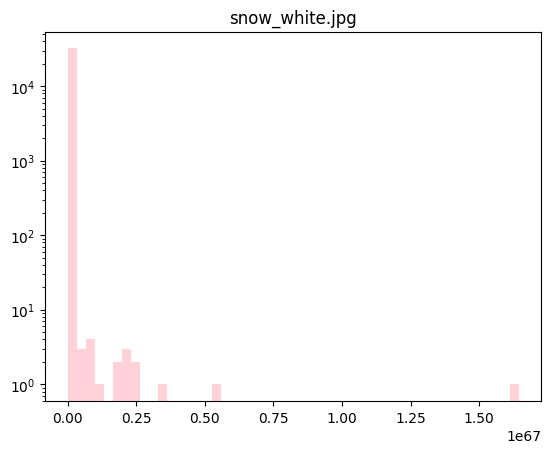

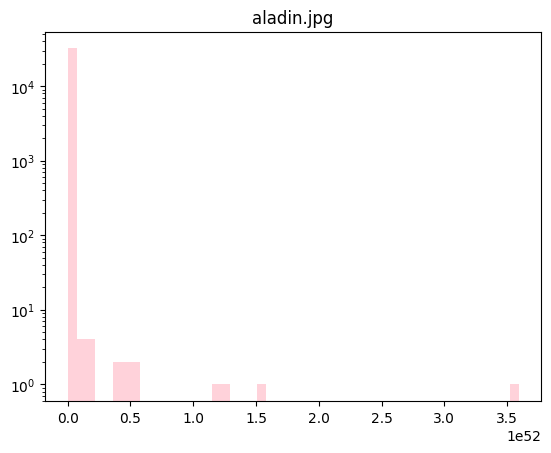

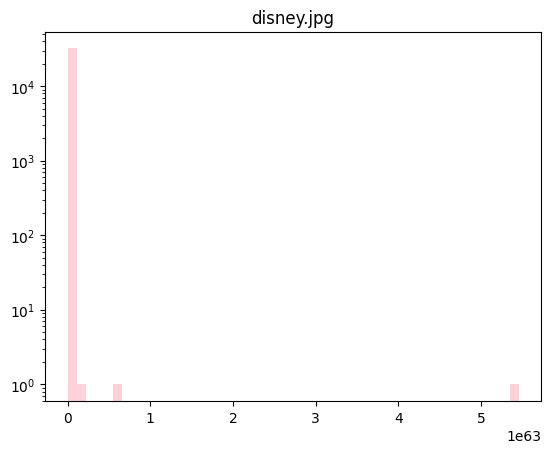

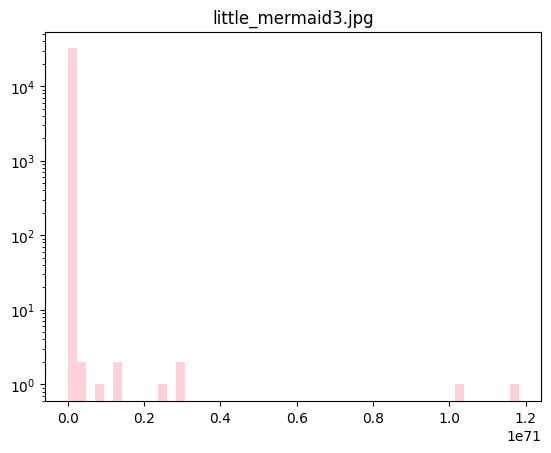

In [4]:
output_folder = "fragments"



files = os.listdir("disney_puzzle")
for f in files:
    path = os.path.join("disney_puzzle",f)
    is_match_scores = []
    is_not_match_scores = []
    fragments = divide_image(path, output_folder, COL_NR, ROW_NR)
    sides_comparisons = create_sides_comparisons(fragments)

    for s in sides_comparisons:
        if s.is_valid_match:
            is_match_scores.append(s.score)
        else:
            is_not_match_scores.append(s.score)

    plt.hist(is_not_match_scores, bins=50, alpha=0.7, color='pink')
    plt.hist(is_match_scores, bins=50, alpha=0.7, color='blue')
    plt.title(f)
    plt.yscale('log')
    plt.show()